In [1]:
import pandas as pd
data=pd.read_csv("/content/Arrests.csv")
print(data)

      rownames colour  year  age     sex employed citizen  checks released
0            1  White  2002   21    Male      Yes     Yes       3      Yes
1            2  Black  1999   17    Male      Yes     Yes       3       No
2            3  White  2000   24    Male      Yes     Yes       3      Yes
3            4  Black  2000   46    Male      Yes     Yes       1       No
4            5  Black  1999   27  Female      Yes     Yes       1      Yes
...        ...    ...   ...  ...     ...      ...     ...     ...      ...
5221      5222  White  2000   17    Male      Yes     Yes       0      Yes
5222      5223  White  2000   21  Female      Yes     Yes       0      Yes
5223      5224  Black  1999   21  Female      Yes     Yes       1      Yes
5224      5225  Black  1998   24    Male      Yes     Yes       4       No
5225      5226  White  1999   16    Male      Yes     Yes       3      Yes

[5226 rows x 9 columns]


In [2]:
data.isnull().sum()

rownames    0
colour      0
year        0
age         0
sex         0
employed    0
citizen     0
checks      0
released    0
dtype: int64

In [3]:
from sklearn.preprocessing import LabelEncoder
b=LabelEncoder()
data["colour"]=b.fit_transform(data["colour"])
data["sex"]=b.fit_transform(data["sex"])
data["employed"]=b.fit_transform(data["employed"])
data["citizen"]=b.fit_transform(data["citizen"])
data["released"]=b.fit_transform(data["released"])

In [ ]:
print(data)

      rownames  colour  year  age  sex  employed  citizen  checks  released
0            1       1  2002   21    1         1        1       3         1
1            2       0  1999   17    1         1        1       3         0
2            3       1  2000   24    1         1        1       3         1
3            4       0  2000   46    1         1        1       1         0
4            5       0  1999   27    0         1        1       1         1
...        ...     ...   ...  ...  ...       ...      ...     ...       ...
5221      5222       1  2000   17    1         1        1       0         1
5222      5223       1  2000   21    0         1        1       0         1
5223      5224       0  1999   21    0         1        1       1         1
5224      5225       0  1998   24    1         1        1       4         0
5225      5226       1  1999   16    1         1        1       3         1

[5226 rows x 9 columns]


(array([[1.730e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 8.860e+02],
        [3.120e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 1.704e+03],
        [1.800e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 8.040e+02],
        [7.000e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 3.470e+02],
        [6.400e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 2.800e+02],
        [6.000e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 1.920e+02],
        [2.600e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 7.000e+01],
        [5.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.

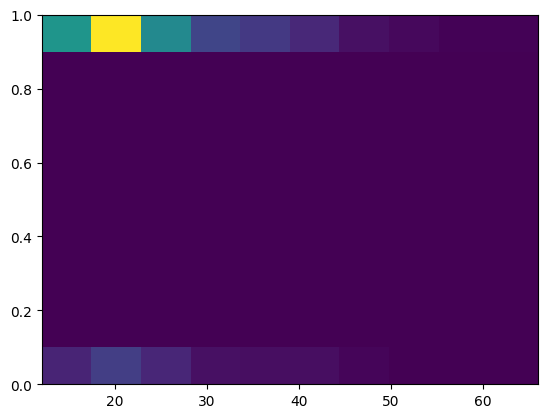

In [5]:
from matplotlib import pyplot as plt
plt.hist2d(data["age"],data["released"])

In [6]:
x=data.drop("released",axis=1)
y=data["released"]

In [7]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.02)


In [8]:
from sklearn.linear_model import LogisticRegression
br=LogisticRegression()
br.fit(xtrain,ytrain)
ypred=br.predict(xtest)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
c=br.predict([[5227,0,1999,20,0,1,0,4]])
print("Output :",c)

Output : [1]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [10]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest,ypred))

[[ 0 14]
 [ 0 91]]


In [11]:
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest,ypred))

0.8666666666666667


In [12]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.87      1.00      0.93        91

    accuracy                           0.87       105
   macro avg       0.43      0.50      0.46       105
weighted avg       0.75      0.87      0.80       105



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
